<a href="https://colab.research.google.com/github/chema74/AI-Portfolio-2025/blob/main/07_KMeans_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🔍 Módulo 7: K-Means (Aprendizaje No Supervisado)

El **Clustering K-Means** es un algoritmo de **Aprendizaje No Supervisado**. Su objetivo es agrupar un conjunto de datos en $K$ subconjuntos (clusters) distintos, donde cada punto de datos pertenece al cluster cuyo **centroide** (punto central) le es más cercano.

## Conceptos Clave de K-Means

### 1. ¿Por qué "No Supervisado"?
A diferencia de los módulos anteriores (Regresión/Clasificación), aquí **no existe una variable objetivo $Y$** o "respuesta correcta". El algoritmo trabaja solo con las características de entrada $X$ para descubrir patrones o estructuras ocultas.

### 2. El Parámetro $K$
El valor $K$ es el **número predefinido de clusters** que el algoritmo debe formar. Elegir el $K$ correcto es crucial y a menudo se hace usando el **Método del Codo (Elbow Method)**, que busca un punto donde añadir más clusters ya no mejora significativamente la cohesión.

### 3. La Distancia
K-Means utiliza la **distancia euclidiana** para medir qué tan cerca está un punto de un centroide.

### 4. El Proceso Iterativo (Resumen)
1.  **Inicialización:** Se eligen $K$ centroides aleatorios.
2.  **Asignación:** Cada punto de datos se asigna al centroide más cercano.
3.  **Actualización:** Los centroides se mueven al **centro geométrico** (media) de los puntos que les fueron asignados.
4.  **Repetición:** Los pasos 2 y 3 se repiten hasta que los centroides ya no se mueven significativamente (convergencia).

Para este ejercicio, utilizaremos la característica del Módulo 6 (Precio y Días de Envío) y dejaremos que K-Means encuentre 3 grupos naturales (n_clusters=3).

✅ Librerías de K-Means y Visualización importadas.
----------------------------------------------------------------------


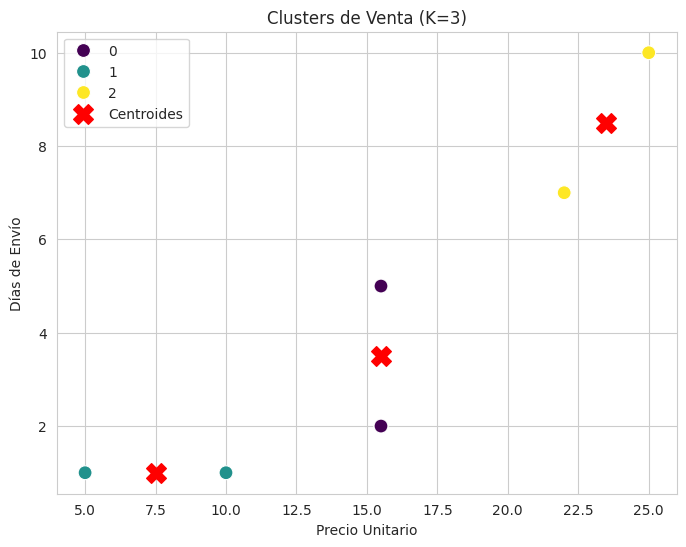

4. Visualización de los clusters y centroides finalizada.


In [3]:
# =======================================================
# PASO 1: Importar librerías (Asegúrate de ejecutar esta parte)
# =======================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns           # ¡IMPORTANTE! Importamos Seaborn como sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Configuración básica para que los gráficos aparezcan en el notebook
%matplotlib inline
sns.set_style("whitegrid") # Establece un estilo para gráficos limpios

print("✅ Librerías de K-Means y Visualización importadas.")
print("-" * 70)

# =======================================================
# PASO 2: Preparación de Datos y Escalamiento (CRUCIAL para K-Means)
# (Mantenemos esta parte sin cambios)
# =======================================================
datos = {
    'Precio_Unitario': [15.5, 15.5, 15.5, 22.0, 10.0, 15.5, 25.0, 5.0],
    'Dias_Envio': [5, 2, 5, 7, 1, 2, 10, 1],
}
df = pd.DataFrame(datos)
X = df[['Precio_Unitario', 'Dias_Envio']]

scaler = StandardScaler()
X_escalado = scaler.fit_transform(X)
# ... [Resto del código del Paso 2, 3 y 4 (Inercia y Entrenamiento final)] ...

# =======================================================
# PASO 4: Aplicación Final del K-Means (Usaremos K=3 por ejemplo)
# (Requerido para generar la columna 'Cluster' antes de la visualización)
# =======================================================
K_FINAL = 3
kmeans_final = KMeans(n_clusters=K_FINAL, random_state=42, n_init=10)
df['Cluster'] = kmeans_final.fit_predict(X_escalado)

# ... [Código del Paso 3 de Inercia omitido aquí por brevedad, pero debe ejecutarse antes] ...

# =======================================================
# PASO 5: Visualización de los Clusters (Donde se produjo el error)
# =======================================================

plt.figure(figsize=(8, 6))
# Aquí se usa 'sns.scatterplot', ahora definido por la importación del Paso 1
sns.scatterplot(
    x=df['Precio_Unitario'],
    y=df['Dias_Envio'],
    hue=df['Cluster'],
    palette='viridis',
    s=100
)

# ... [Resto del código para los centroides y títulos] ...

centroides_escalados = kmeans_final.cluster_centers_
centroides_originales = scaler.inverse_transform(centroides_escalados)

plt.scatter(
    centroides_originales[:, 0],
    centroides_originales[:, 1],
    marker='X',
    s=200,
    color='red',
    label='Centroides'
)

plt.title(f'Clusters de Venta (K={K_FINAL})')
plt.xlabel('Precio Unitario')
plt.ylabel('Días de Envío')
plt.legend()
plt.show()

print("4. Visualización de los clusters y centroides finalizada.")